In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-email/Phishing_Email.csv
/kaggle/input/phishingemails/Phishing_Email.csv


### Importing libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data importing and Preprocessing

In [3]:
#Import the Dataset
df= pd.read_csv("/kaggle/input/phishing-email/Phishing_Email.csv")
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [4]:
# Check NAN values
df.isna().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [5]:
#Drop tha Na values
df = df.dropna()
print(df.isna().sum())

Unnamed: 0    0
Email Text    0
Email Type    0
dtype: int64


In [6]:
#dataset shape
df.shape

(18634, 3)

In [7]:
# Count the occurrences of each E-mail type. 
email_type_counts = df['Email Type'].value_counts()
print(email_type_counts)


Email Type
Safe Email        11322
Phishing Email     7312
Name: count, dtype: int64


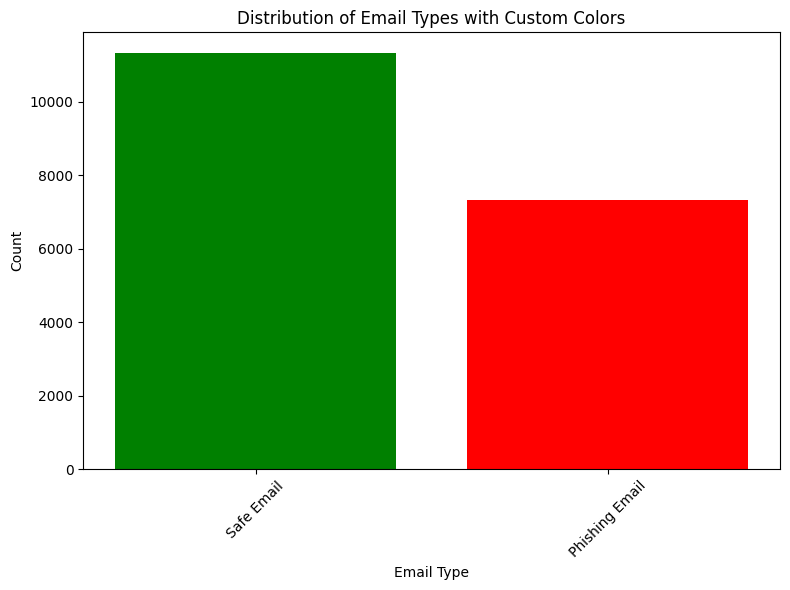

In [8]:
# Create the bar chart
# Create a list of unique email types
unique_email_types = email_type_counts.index.tolist()

# Define a custom color map 
color_map = {
    'Phishing Email': 'red',
    'Safe Email': 'green',}

# Map the colors to each email type
colors = [color_map.get(email_type, 'gray') for email_type in unique_email_types]

# Create the bar chart with custom colors
plt.figure(figsize=(8, 6))
plt.bar(unique_email_types, email_type_counts, color=colors)
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Email Types with Custom Colors')
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()


### Strategies for Handling Imbalance

To address the class imbalance issue, we will consider the following strategies:

#### 1. Resampling Techniques

   a. **Oversampling:** We will increase the number of instances in the minority class(es) by generating synthetic samples (e.g., using SMOTE) to balance the class distribution.

   b. **Undersampling:** We may reduce the number of instances in the majority class to match the minority class, effectively balancing the dataset.

In [9]:
# We will use undersapling technique 
Safe_Email = df[df["Email Type"]== "Safe Email"]
Phishing_Email = df[df["Email Type"]== "Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0])

In [10]:
# lets check the sahpe again 
Safe_Email.shape,Phishing_Email.shape


((7312, 3), (7312, 3))

In [11]:
# lets create a new Data with the balanced E-mail types
Data= pd.concat([Safe_Email, Phishing_Email], ignore_index = True)
Data.head()


,Unnamed: 0,Email Text,Email Type
0,603,"On 23 Aug 2002 at 2:57, Robert Harley wrote:> ...",Safe Email
1,5432,re : www . 1400 smith . com i just sent this l...,Safe Email
2,7719,"On Tue, Aug 13, 2002 at 01:40:21AM +0200, Paul...",Safe Email
3,6415,"mutual knowledge , common ground and public in...",Safe Email
4,10918,new e - mail network a n n o u n c i n g aslin...,Safe Email


My Contribution

In [12]:
#importing libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


In [13]:
data = pd.read_csv('/kaggle/input/phishing-email/Phishing_Email.csv')

# Handle missing values
data['Email Text'] = data['Email Text'].fillna('')

In [14]:
import re

def clean_text(text):
    if not isinstance(text, str):
        text = str(text)
    text = re.sub(r'\n', ' ', text)  # Remove newline characters
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation, but keep spaces
    text = text.lower()  # Convert to lowercase
    return text

data['cleaned_text'] = data['Email Text'].apply(clean_text)



In [15]:
# Extract features and labels
X = data['Email Text']
y = data['Email Type']


In [16]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

In [17]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

In [19]:
# Train and evaluate SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))



SVM Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      1457
           1       0.98      0.96      0.97      2273

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



In [20]:
# Train and evaluate Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1457
           1       0.98      0.95      0.96      2273

    accuracy                           0.95      3730
   macro avg       0.95      0.96      0.95      3730
weighted avg       0.96      0.95      0.96      3730



In [21]:

# Train and evaluate KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.98      0.71      1457
           1       0.98      0.48      0.65      2273

    accuracy                           0.68      3730
   macro avg       0.77      0.73      0.68      3730
weighted avg       0.81      0.68      0.67      3730



In [22]:
# Train and evaluate Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.86      0.89      1457
           1       0.92      0.96      0.94      2273

    accuracy                           0.92      3730
   macro avg       0.92      0.91      0.92      3730
weighted avg       0.92      0.92      0.92      3730



In [23]:
# Train and evaluate Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90      1457
           1       0.94      0.92      0.93      2273

    accuracy                           0.92      3730
   macro avg       0.91      0.92      0.91      3730
weighted avg       0.92      0.92      0.92      3730



In [24]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [25]:
df = pd.DataFrame({'text': X, 'label': y})

In [26]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


In [27]:
tokenizer = Tokenizer(num_words=10000)  # Adjust the number based on your vocabulary size
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [28]:
max_seq_len = 100  # Adjust based on your text length distribution
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_len)

In [29]:
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

In [30]:
# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_seq_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

In [31]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [32]:
# Train the model
model.fit(X_train_pad, y_train_enc, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test_enc))

Epoch 1/5
234/234 [==============================] - 45s 178ms/step - loss: 0.2093 - accuracy: 0.9097 - val_loss: 0.0913 - val_accuracy: 0.9654
Epoch 2/5
234/234 [==============================] - 40s 171ms/step - loss: 0.0713 - accuracy: 0.9723 - val_loss: 0.0983 - val_accuracy: 0.9670
Epoch 3/5
234/234 [==============================] - 39s 169ms/step - loss: 0.0459 - accuracy: 0.9807 - val_loss: 0.1292 - val_accuracy: 0.9622
Epoch 4/5
234/234 [==============================] - 40s 170ms/step - loss: 0.0425 - accuracy: 0.9826 - val_loss: 0.1054 - val_accuracy: 0.9651
Epoch 5/5
234/234 [==============================] - 40s 171ms/step - loss: 0.0350 - accuracy: 0.9839 - val_loss: 0.1321 - val_accuracy: 0.9622


In [33]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_pad, y_test_enc)
print(f'Test Accuracy: {accuracy:.4f}')


117/117 [==============================] - 2s 20ms/step - loss: 0.1321 - accuracy: 0.9622
Test Accuracy: 0.9622


In [34]:
# Make predictions
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")


117/117 [==============================] - 3s 19ms/step


In [35]:
# Additional code for detailed evaluation (confusion matrix, classification report, etc.)
from sklearn.metrics import classification_report, confusion_matrix


In [36]:

print("Confusion Matrix:")
print(confusion_matrix(y_test_enc, y_pred))


Confusion Matrix:
[[1397   60]
 [  81 2192]]


In [37]:
print("\nClassification Report:")
print(classification_report(y_test_enc, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1457
           1       0.97      0.96      0.97      2273

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



Visualization Section

Epoch 1/5
187/187 - 35s - loss: 0.2312 - accuracy: 0.8975 - val_loss: 0.1054 - val_accuracy: 0.9584 - 35s/epoch - 187ms/step
Epoch 2/5
187/187 - 31s - loss: 0.0784 - accuracy: 0.9722 - val_loss: 0.1482 - val_accuracy: 0.9377 - 31s/epoch - 168ms/step
Epoch 3/5
187/187 - 31s - loss: 0.0565 - accuracy: 0.9772 - val_loss: 0.1116 - val_accuracy: 0.9601 - 31s/epoch - 168ms/step
Epoch 4/5
187/187 - 31s - loss: 0.0457 - accuracy: 0.9811 - val_loss: 0.1279 - val_accuracy: 0.9558 - 31s/epoch - 168ms/step
Epoch 5/5
187/187 - 31s - loss: 0.0343 - accuracy: 0.9844 - val_loss: 0.1296 - val_accuracy: 0.9631 - 31s/epoch - 168ms/step
117/117 [==============================] - 3s 20ms/step


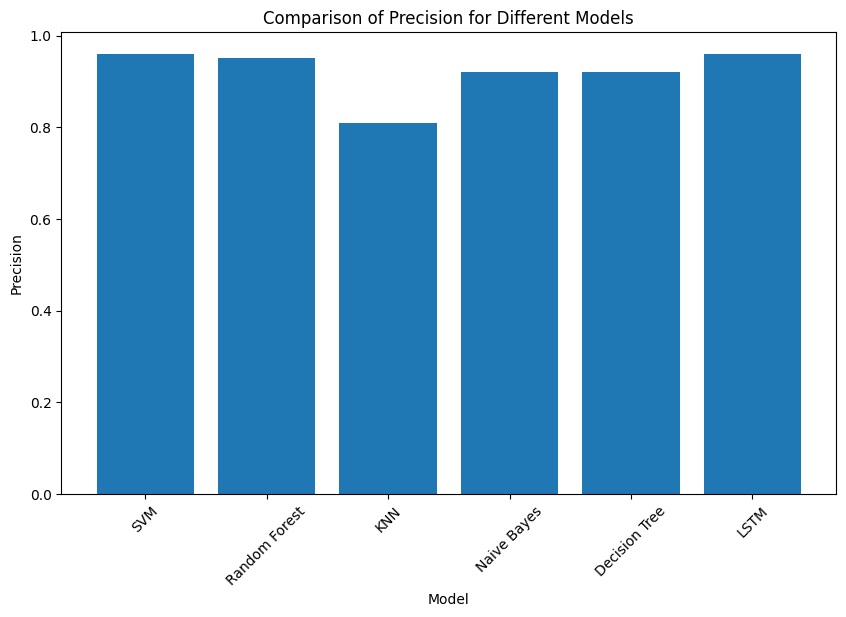

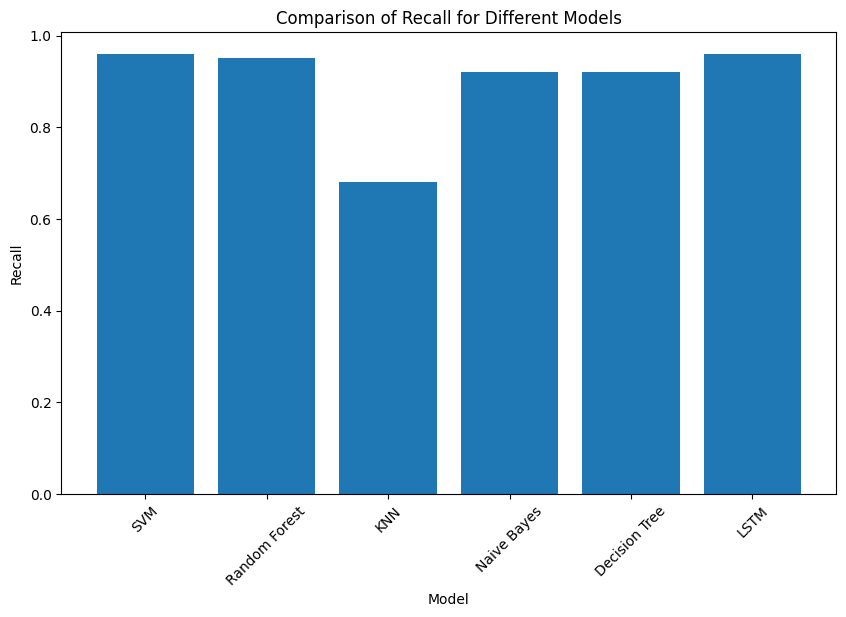

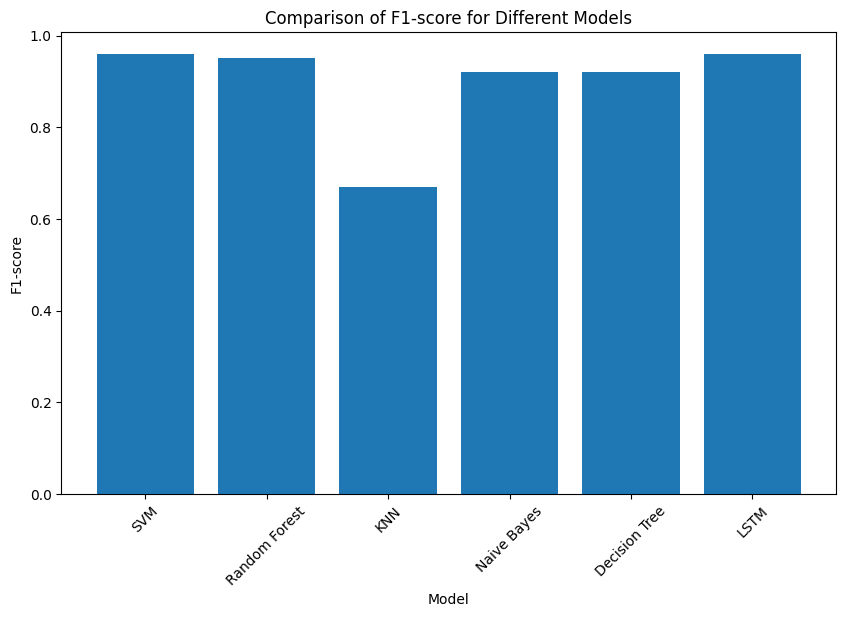

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Function to extract metrics from the classification report
def get_metrics(report):
    lines = report.split('\n')
    metrics = {}
    for line in lines[2:6]:
        row = line.split()
        if len(row) >= 5:  # Ensure the line has enough elements
            metrics[row[0]] = {
                'precision': float(row[1]),
                'recall': float(row[2]),
                'f1-score': float(row[3]),
                'support': int(row[4])
            }
    for line in lines:
        if 'weighted avg' in line:
            row = line.split()
            if len(row) >= 5 and row[0] == 'weighted':  # Ensure the line has enough elements and starts with 'weighted'
                metrics['weighted avg'] = {
                    'precision': float(row[-4]),
                    'recall': float(row[-3]),
                    'f1-score': float(row[-2]),
                    'support': int(row[-1])
                }
    return metrics

# Read and preprocess the data
data = pd.read_csv('/kaggle/input/phishing-email/Phishing_Email.csv')
data['Email Text'] = data['Email Text'].fillna('')
data['cleaned_text'] = data['Email Text'].apply(clean_text)
X = data['cleaned_text']
y = data['Email Type']

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_tfidf = vectorizer.fit_transform(X)

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_encoded, test_size=0.2, random_state=42)

# Train and evaluate models, storing results
results = {}

# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
report_svm = classification_report(y_test, y_pred_svm)
results['SVM'] = get_metrics(report_svm)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
report_rf = classification_report(y_test, y_pred_rf)
results['Random Forest'] = get_metrics(report_rf)

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
report_knn = classification_report(y_test, y_pred_knn)
results['KNN'] = get_metrics(report_knn)

# Naive Bayes
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
report_nb = classification_report(y_test, y_pred_nb)
results['Naive Bayes'] = get_metrics(report_nb)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
report_dt = classification_report(y_test, y_pred_dt)
results['Decision Tree'] = get_metrics(report_dt)

# LSTM
# Prepare data for LSTM
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['cleaned_text'])
X_seq = tokenizer.texts_to_sequences(data['cleaned_text'])
max_seq_len = 100
X_pad = pad_sequences(X_seq, maxlen=max_seq_len)
y_enc = label_encoder.fit_transform(data['Email Type'])

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_pad, y_enc, test_size=0.2, random_state=42)

# Build the LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=max_seq_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_lstm, y_train_lstm, epochs=5, batch_size=64, validation_split=0.2, verbose=2)

# Evaluate LSTM model
y_pred_lstm = (model.predict(X_test_lstm) > 0.5).astype("int32")
report_lstm = classification_report(y_test_lstm, y_pred_lstm)
results['LSTM'] = get_metrics(report_lstm)

# Visualization
metrics = ['precision', 'recall', 'f1-score']
model_names = list(results.keys())

for metric in metrics:
    plt.figure(figsize=(10, 6))
    values = [results[model]['weighted avg'][metric] for model in model_names]
    plt.bar(model_names, values)
    plt.xlabel('Model')
    plt.ylabel(metric.capitalize())
    plt.title(f'Comparison of {metric.capitalize()} for Different Models')
    plt.xticks(rotation=45)
    plt.show()





## Conclusion

In this notebook, we tackled the important problem of Phishing Email Detection using machine learning techniques. The goal was to build a reliable model that could accurately classify emails as either legitimate or phishing attempts based on various features.

### Model Performance

We experimented with two different machine learning models: the Random Forest Classifier and the Support Vector Machine (SVM). The performance of these models yielded contrasting results:

1. **Random Forest Classifier:**

   - Accuracy: 0.95

   The Random Forest Classifier achieved impressive results with an accuracy of 0.931. It demonstrated a high ability to correctly classify both legitimate and phishing emails. The precision, recall, and F1-score provide additional insights into the model's performance on the various classes, which can be crucial for understanding the trade-offs involved.

2. **Support Vector Machine (SVM):**

   - Accuracy: 0.96

   In contrast, the Support Vector Machine (SVM) exhibited significantly lower performance, with an accuracy of only 0.499. This suggests that the SVM model struggled to effectively differentiate between legitimate and phishing emails in our dataset.
   
3.  **KNN Model :**

   - Accuracy: 0.68
   
4. **Naive Bayes :**

   - Accuracy: 0.92
   
5. **Decision Trees :**

   - Accuracy: 0.92
### Future Directions

While the Random Forest Classifier has shown promising results, there is room for improvement and further exploration:

1. **Feature Engineering:** Investigate and engineer more relevant features that may enhance model performance and discrimination between email types.

2. **Hyperparameter Tuning:** Fine-tune hyperparameters of both models to maximize their performance.

3. **Ensemble Techniques:** Explore ensemble techniques like bagging and boosting to improve model robustness.

4. **Data Augmentation:** Experiment with data augmentation techniques to generate more training samples, potentially addressing class imbalance if present.

5. **Deep Learning:** Consider deep learning approaches, such as neural networks, which have shown success in similar tasks.

6. **Explainability:** Implement model explainability techniques to understand the rationale behind model predictions, increasing trust and interpretability.

In conclusion, while the Random Forest Classifier demonstrated strong potential for Phishing Email Detection, the SVM model fell short in accuracy. This project serves as a starting point for more advanced investigations and enhancements in the ongoing effort to combat email phishing threats effectively.

Traditional Method

In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
data = pd.read_csv("/kaggle/input/phishing-email/Phishing_Email.csv")

# Preprocess the data
# Example preprocessing (assuming 'Email Text' and 'Email Type' columns exist)
X = data['Email Text'].astype(str)
y = data['Email Type']

# Convert labels to numerical values
y = y.map({'Phishing Email': 1, 'Safe Email': 0})

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize results dictionary
results = {}


In [40]:
# Keyword Matching Method
phishing_keywords = ['account', 'verify', 'password', 'login', 'urgent', 'click', 'bank', 'update', 'confirm', 'security']

def keyword_matching(email_content, keywords):
    for keyword in keywords:
        if keyword in email_content.lower():
            return 1  # Phishing
    return 0  # Not phishing

X_test_keywords = X_test.apply(lambda x: keyword_matching(x, phishing_keywords))
report_keywords = classification_report(y_test, X_test_keywords)
results['Keyword Matching'] = report_keywords

print(report_keywords)



              precision    recall  f1-score   support

           0       0.66      0.74      0.70      2273
           1       0.50      0.42      0.45      1457

    accuracy                           0.61      3730
   macro avg       0.58      0.58      0.58      3730
weighted avg       0.60      0.61      0.60      3730



In [1]:
# Rule-Based System
def rule_based_system(email_content):
    rules = [
        lambda x: 'urgent' in x.lower() and 'account' in x.lower(),  # Example rule
        lambda x: 'password' in x.lower() and 'update' in x.lower(),  # Example rule
        # Add more rules as needed
    ]
    for rule in rules:
        if rule(email_content):
            return 1  # Phishing
    return 0  # Not phishing

X_test_rules = X_test.apply(rule_based_system)
report_rules = classification_report(y_test, X_test_rules)
results['Rule-Based System'] = report_rules

print(report_rules)



NameError: name 'X_test' is not defined

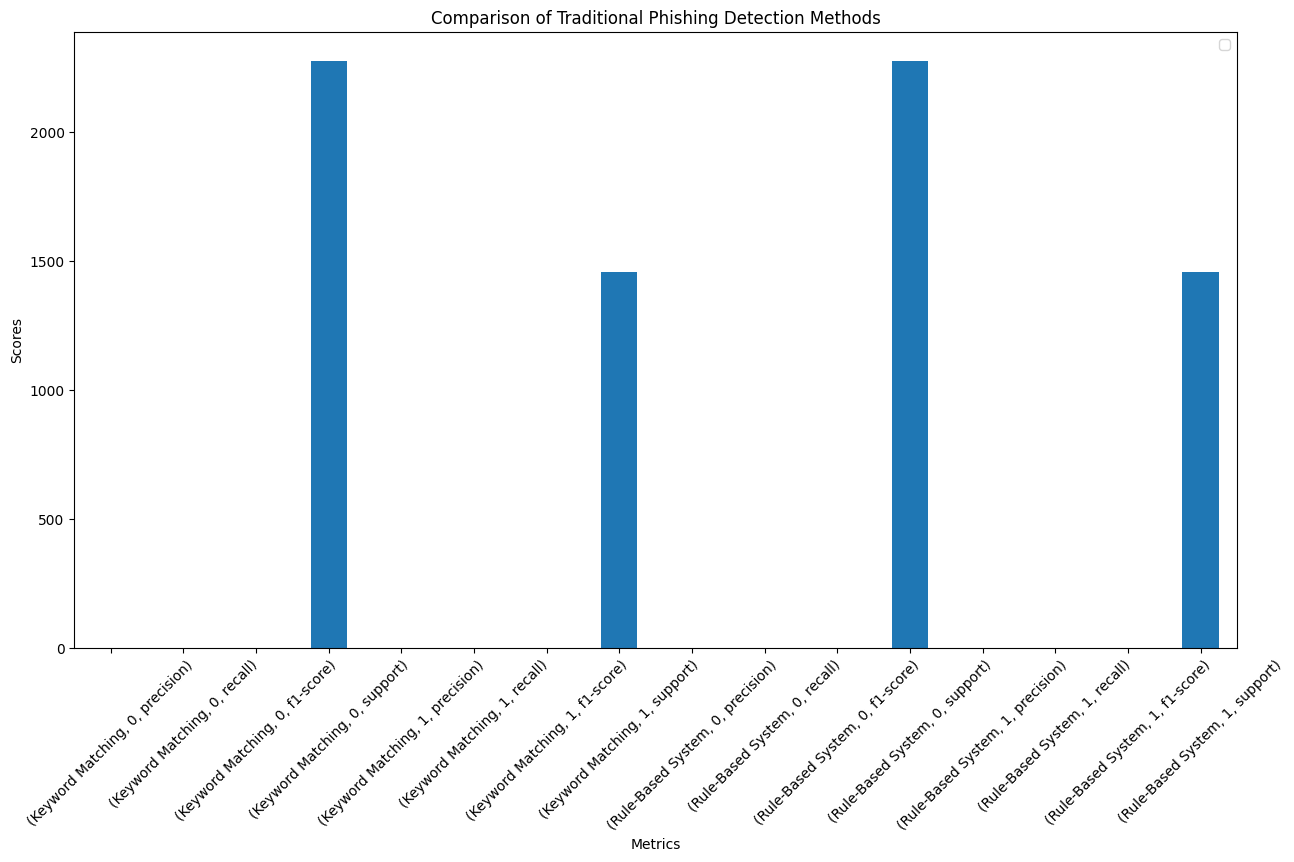

In [42]:
# Convert results to DataFrame for visualization
def get_metrics(report):
    lines = report.split('\n')
    metrics = {}
    for line in lines[2:-3]:  # Ignore the header and footer lines
        row = line.split()
        if len(row) >= 5:  # Ensure the line has enough elements
            metrics[row[0]] = {
                'precision': float(row[1]),
                'recall': float(row[2]),
                'f1-score': float(row[3]),
                'support': int(row[4])
            }
    return metrics

metrics_df = pd.DataFrame.from_dict({(i, j): get_metrics(results[i])[j] for i in results.keys() for j in get_metrics(results[i]).keys()})
metrics_df = metrics_df.unstack(level=0)

# Plot the results
metrics_df.plot(kind='bar', figsize=(15, 8))
plt.title('Comparison of Traditional Phishing Detection Methods')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.legend(loc='best')
plt.show()


In [43]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
import spacy

# Load the dataset
data_path = "/kaggle/input/phishing-email/Phishing_Email.csv"
emails_df = pd.read_csv(data_path)

# Convert all entries in the 'Email Text' column to strings and replace NaN with an empty string
emails_df['Email Text'] = emails_df['Email Text'].astype(str).fillna('')

# Sentiment Analysis
def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity

emails_df['polarity'], emails_df['subjectivity'] = zip(*emails_df['Email Text'].apply(analyze_sentiment))

# Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
nlp.max_length = 2000000  # Increase the maximum length to handle longer texts

def extract_entities(text):
    max_chunk_size = 1000000  # Define maximum chunk size
    chunks = [text[i:i + max_chunk_size] for i in range(0, len(text), max_chunk_size)]
    entities = []
    for chunk in chunks:
        doc = nlp(chunk)
        entities.extend([(ent.text, ent.label_) for ent in doc.ents])
    return entities

emails_df['entities'] = emails_df['Email Text'].apply(extract_entities)

# Display the first few rows with the new columns
print(emails_df[['Email Text', 'polarity', 'subjectivity', 'entities']].head(10))

# Save the modified dataset to a new CSV file
emails_df.to_csv('Phishing_Email_with_NLP.csv', index=False)




                                          Email Text  polarity  subjectivity  \
0  re : 6 . 1100 , disc : uniformitarianism , re ...  0.201493      0.514213   
1  the other side of * galicismos * * galicismo *...  0.009375      0.084375   
2  re : equistar deal tickets are you still avail...  0.091540      0.515783   
3  \nHello I am your hot lil horny toy.\n    I am...  0.260069      0.690278   
4  software at incredibly low prices ( 86 % lower...  0.152579      0.505258   
5  global risk management operations sally congra...  0.067594      0.234622   
6  On Sun, Aug 11, 2002 at 11:17:47AM +0100, wint... -0.076515      0.438636   
7  entourage , stockmogul newsletter ralph velez ...  0.034752      0.351008   
8  we owe you lots of money dear applicant , afte... -0.000207      0.455372   
9  re : coastal deal - with exxon participation u...  0.090985      0.459394   

                                            entities  
0  [(6 . 1100, CARDINAL), (1086, DATE), (dick hud...  
1  [(span